# TJAAG - Research & Analysis (Project #4)
Holden Bruce

For the TJAAG Research & Data project, I will be focused on modeling the relationship between geography, wealth, and admissions.

### Important Consideration
The data is inconsistent. Thomas Jefferson has only released middle school specific admissions data up until the Class of 2022 (2018 data) while reliable family income data from the Census is available up until 2019. 

I do a few things in here to maintain some sort of consistency. Noteably: for admissions statistics, I reuse 2018 (Class of 2020) data when plotting against family income data. 

In [41]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from IPython.display import HTML

middle_schools_areas = gpd.read_file('middle_schools_areas_jan31.shp')
middle_schools_areas

,SCHOOL_NAM,CITY,ZIP,Shape__Are,Shape__Len,YEAR,FAM_INCOME,PERC_POVER,TOT_ADMIT,AAP,geometry
0,CARSON,HERNDON,20171,4.090735e+08,140426.247323,2019,187130.689467,0.033291,78,YES,"POLYGON ((-77.38339 38.95260, -77.38322 38.952..."
1,COOPER,MCLEAN,22101,1.230428e+09,236742.140726,2019,351033.548622,0.023015,8,YES,"POLYGON ((-77.32833 39.05769, -77.32816 39.057..."
2,FRANKLIN,CHANTILLY,20151,4.057657e+08,154918.727298,2019,208201.580067,0.016814,0,NO,"POLYGON ((-77.41445 38.92799, -77.41432 38.927..."
3,FROST,FAIRFAX,22032,4.923730e+08,175702.028789,2019,192970.712256,0.016958,22,YES,"POLYGON ((-77.23408 38.86523, -77.23427 38.864..."
4,GLASGOW,ALEXANDRIA,22312,2.349001e+08,80961.006752,2019,132921.286973,0.103446,0,YES,"POLYGON ((-77.16025 38.87394, -77.15826 38.873..."
...,...,...,...,...,...,...,...,...,...,...,...
151,SOUTH COUNTY,LORTON,22079,8.878935e+08,223476.603738,2014,173697.751337,0.000000,5,YES,"POLYGON ((-77.27914 38.74627, -77.27911 38.746..."
152,STONE,CENTREVILLE,20120,5.508739e+08,117370.441464,2014,144352.026112,0.000000,4,NO,"POLYGON ((-77.44312 38.84116, -77.44388 38.840..."
153,THOREAU,VIENNA,22180,4.796591e+08,159064.168701,2014,180484.548503,0.000000,2,NO,"POLYGON ((-77.29700 38.94074, -77.29742 38.940..."
154,TWAIN,ALEXANDRIA,22310,2.417610e+08,84052.257861,2014,139677.655842,0.000000,11,YES,"POLYGON ((-77.10140 38.80352, -77.10136 38.803..."


# Total Students Admitted to TJ by Middle School

In [38]:
fig = px.bar(
    middle_schools_areas,
    x=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2017', 'SCHOOL_NAM'], 
    y=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2017', 'TOT_ADMIT'],
    title='Bar Plot of Admssions Statistics for 2017'
)
fig.update_layout(
    xaxis_title='Middle School Name',
    yaxis_title='Number of Students Admitted'
)
fig.show()

In [6]:
from IPython.display import IFrame
IFrame('https://arcg.is/1Cu85W0', width=800, height=500)

## First step:
Plot the admissions data each year against the average family income for that middle school.

#### Important consideration:
I used block group census data for family income and overlayed the geometry of zones middle school attendance zones to aggregate the block group data up. I then divided by the number of families in that region to create an estimate of the average aggregate family income for a middle school student at each middle school.

While this is as good an estimate of middle school family wealth as we can get, it is still an imperfect estimate. Please keep in mind that because family-specific income data is not publicly available, take these findings with a grain of salt and understand that averages can always be misleading. A few wealthy families can skew the data. 

#### A bit of hope: 
The reason why I am not too concerned with the potential impact of using averages in this family income estimate is because the underlying assumption we are testing in this project is whether family income disproportionately impacts admissions data. If there are a few super wealthy families in a town and that is throwing off the average but those family's kids are getting admitted to TJ, then it doesn't really matter. Unfortunately, we cannot know which family's are gaining admission and what their family income is, so it is a moot point. An average of the entire region is the best we can do.

#### Room for improvement: 
Using weighted averages of the various income brackets (i.e. \\$0-\\$40k, \\$40000-\\$70k, \\$70k-\\$100k, etc) could better account for the true distribution of wealth in the middle school region. 

#### Final reason for caring about averages of family income: 
Public schools' funding is based in part on the income taxes paid by the local region. So, we expect a wealthy neighborhood to have a better funded school than a poor neighborhood. 

In [15]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
# Add traces
fig.add_trace(
    go.Scatter(
        mode='markers',
        x=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2019', 'SCHOOL_NAM'], 
        y=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2019', 'TOT_ADMIT'], 
        marker=dict(
            size=15
        ),
        name="Scatter Plot Admissions Data"),
    secondary_y=True,
)
fig.add_trace(
    go.Bar(
        x=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2019', 'SCHOOL_NAM'],
        y=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2019', 'FAM_INCOME'], 
        name="Bar Chart Income Data"),
    secondary_y=False,
)
# Add figure title
fig.update_layout(
    title_text="Plot of the Average Family Income and Admissions Rates for each Middle School in Fairfax County - 2019"
)
# Set x-axis title
fig.update_xaxes(title_text="Middle School Name")
# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> Scatter Plot Admissions Data", secondary_y=True)
fig.update_yaxes(title_text="<b>secondary</b> Bar Chart Income Data",tickprefix="$", secondary_y=False)
fig.show()

In [18]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
# Add traces
fig.add_trace(
    go.Scatter(
        mode='markers',
        x=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2019', 'SCHOOL_NAM'], 
        y=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2019', 'TOT_ADMIT'], 
        marker=dict(
            size=10
        ),
        name="Scatter Plot Admissions Data"),
    secondary_y=True,
)
fig.add_trace(
    go.Bar(
        x=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2019', 'SCHOOL_NAM'],
        y=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2019', 'FAM_INCOME'], 
        name="Bar Chart Income Data"),
    secondary_y=False,
)
# Add figure title
fig.update_layout(
    title_text="Plot of the Average Family Income and Admissions Rates for each Middle School in Fairfax County - 2019"
)
# Set x-axis title
fig.update_xaxes(title_text="Middle School Name")
# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> Scatter Plot Admissions Data", secondary_y=True)
fig.update_yaxes(title_text="<b>secondary</b> Bar Chart Income Data",tickprefix="$", secondary_y=False)
fig.show()


In [22]:

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
# Add traces
fig.add_trace(
    go.Scatter(
        mode='markers',
        x=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2018', 'SCHOOL_NAM'], 
        y=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2018', 'TOT_ADMIT'], 
        marker=dict(
            size=10
        ),
        name="Scatter Plot Admissions Data"),
    secondary_y=True,
)
fig.add_trace(
    go.Bar(
        x=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2018', 'SCHOOL_NAM'],
        y=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2018', 'FAM_INCOME'], 
        name="Bar Chart Income Data"),
    secondary_y=False,
)
# Add figure title
fig.update_layout(
    title_text="Plot of the Average Family Income and Admissions Rates for each Middle School in Fairfax County - 2018"
)
# Set x-axis title
fig.update_xaxes(title_text="Middle School Name")
# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> Scatter Plot Admissions Data", secondary_y=True)
fig.update_yaxes(title_text="<b>secondary</b> Bar Chart Income Data",tickprefix="$", secondary_y=False)
fig.show()

In [24]:

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
# Add traces
fig.add_trace(
    go.Scatter(
        mode='markers',
        x=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2017', 'SCHOOL_NAM'], 
        y=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2017', 'TOT_ADMIT'], 
        marker=dict(
            size=10
        ),
        name="Scatter Plot Admissions Data"),
    secondary_y=True,
)
fig.add_trace(
    go.Bar(
        x=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2017', 'SCHOOL_NAM'],
        y=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2017', 'FAM_INCOME'], 
        name="Bar Chart Income Data"),
    secondary_y=False,
)
# Add figure title
fig.update_layout(
    title_text="Plot of the Average Family Income and Admissions Rates for each Middle School in Fairfax County - 2017"
)
# Set x-axis title
fig.update_xaxes(title_text="Middle School Name")
# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> Scatter Plot Admissions Data", secondary_y=True)
fig.update_yaxes(title_text="<b>secondary</b> Bar Chart Income Data",tickprefix="$", secondary_y=False)
fig.show()

In [25]:

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
# Add traces
fig.add_trace(
    go.Scatter(
        mode='markers',
        x=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2016', 'SCHOOL_NAM'], 
        y=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2016', 'TOT_ADMIT'], 
        marker=dict(
            size=10
        ),
        name="Scatter Plot Admissions Data"),
    secondary_y=True,
)
fig.add_trace(
    go.Bar(
        x=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2016', 'SCHOOL_NAM'],
        y=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2016', 'FAM_INCOME'], 
        name="Bar Chart Income Data"),
    secondary_y=False,
)
# Add figure title
fig.update_layout(
    title_text="Plot of the Average Family Income and Admissions Rates for each Middle School in Fairfax County - 2016"
)
# Set x-axis title
fig.update_xaxes(title_text="Middle School Name")
# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> Scatter Plot Admissions Data", secondary_y=True)
fig.update_yaxes(title_text="<b>secondary</b> Bar Chart Income Data",tickprefix="$", secondary_y=False)
fig.show()

In [26]:

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
# Add traces
fig.add_trace(
    go.Scatter(
        mode='markers',
        x=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2015', 'SCHOOL_NAM'], 
        y=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2015', 'TOT_ADMIT'], 
        marker=dict(
            size=10
        ),
        name="Scatter Plot Admissions Data"),
    secondary_y=True,
)
fig.add_trace(
    go.Bar(
        x=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2015', 'SCHOOL_NAM'],
        y=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2015', 'FAM_INCOME'], 
        name="Bar Chart Income Data"),
    secondary_y=False,
)
# Add figure title
fig.update_layout(
    title_text="Plot of the Average Family Income and Admissions Rates for each Middle School in Fairfax County - 2015"
)
# Set x-axis title
fig.update_xaxes(title_text="Middle School Name")
# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> Scatter Plot Admissions Data", secondary_y=True)
fig.update_yaxes(title_text="<b>secondary</b> Bar Chart Income Data",tickprefix="$", secondary_y=False)
fig.show()

In [27]:

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
# Add traces
fig.add_trace(
    go.Scatter(
        mode='markers',
        x=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2014', 'SCHOOL_NAM'], 
        y=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2014', 'TOT_ADMIT'], 
        marker=dict(
            size=10
        ),
        name="Scatter Plot Admissions Data"),
    secondary_y=True,
)
fig.add_trace(
    go.Bar(
        x=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2014', 'SCHOOL_NAM'],
        y=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2014', 'FAM_INCOME'], 
        name="Bar Chart Income Data"),
    secondary_y=False,
)
# Add figure title
fig.update_layout(
    title_text="Plot of the Average Family Income and Admissions Rates for each Middle School in Fairfax County - 2014"
)
# Set x-axis title
fig.update_xaxes(title_text="Middle School Name")
# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> Scatter Plot Admissions Data", secondary_y=True)
fig.update_yaxes(title_text="<b>secondary</b> Bar Chart Income Data",tickprefix="$", secondary_y=False)
fig.show()

## Major Takeaways

While I assumed that there would be a direct corrletion between family income and admissions rates, that does not seem to be the case. There are several examples of wealth regions producing low admissions numbers. 

From there, I explored some of the other factors that might contribute to a middle schooler's success. After reviewing the admissions data, it became clear to me that the level of academic rigor was prioritized in the admissions process. Middle School students who weren't taking advanced courses were by and large not even being considered in the application.

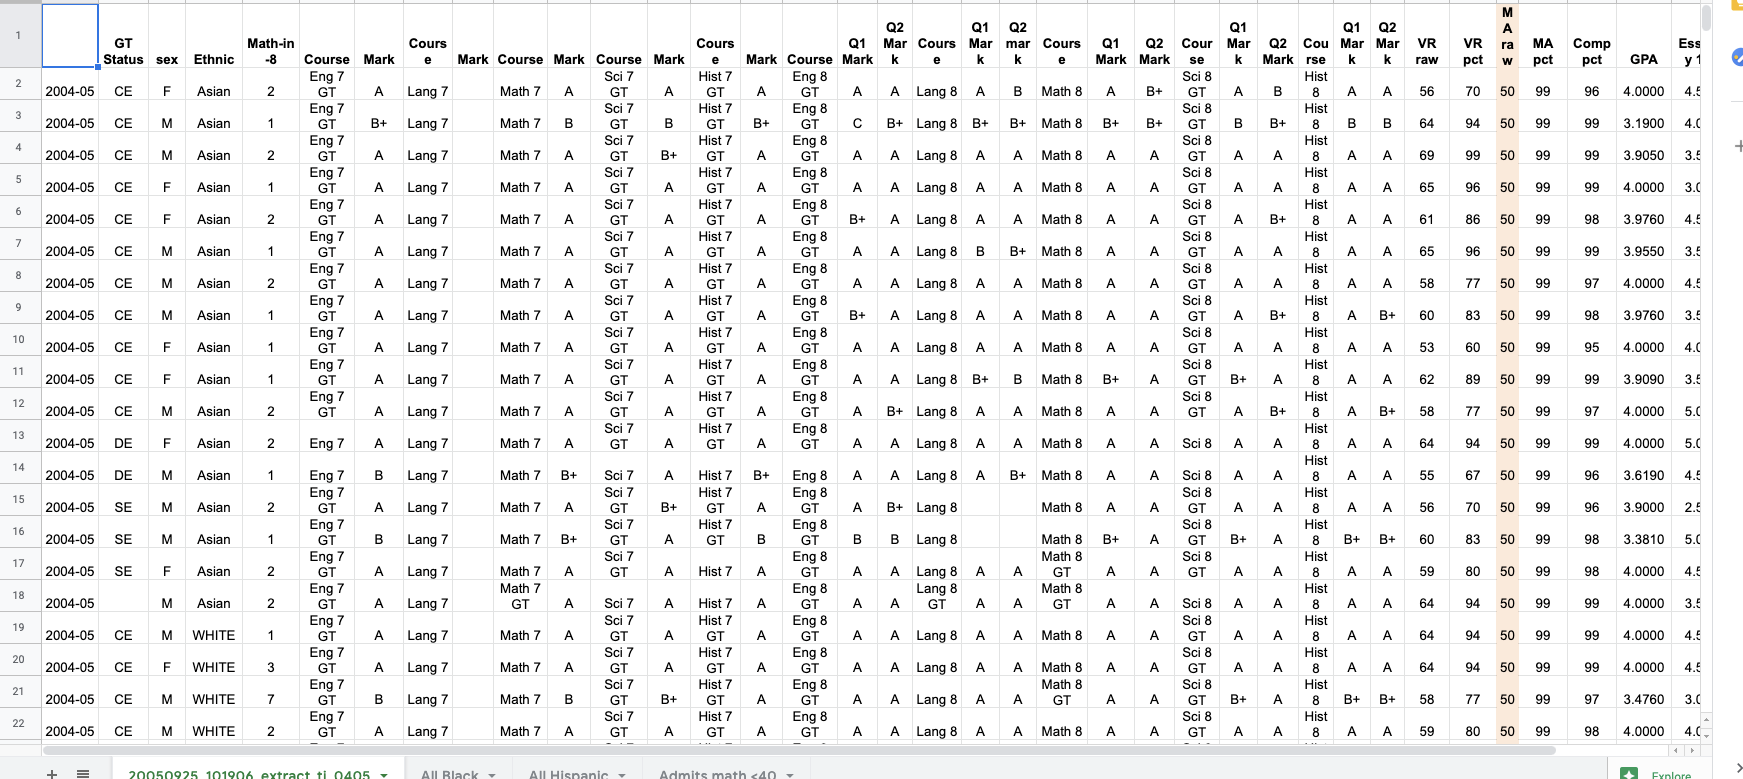

#### Why that matters
With that in mind, I looked at which school offer Advanced Academic Placement courses. The graph comparing admissions rates between the schools that did and did not offer AAP is stark.

In [29]:
middle_schools_areas
# now we can add the slider to the plot where each year is represented at diferent points on the slider
# https://stackoverflow.com/questions/59242519/plotly-how-to-use-multiple-datasets-with-plotly-express-bar-chart
# this is a simple example just using a bar graph
import plotly.express as px
# middle_schools_areas.TOT_ADMIT.max()
# middle_schools_areas.ZIP = middle_schools_areas.ZIP.astype('string') #changing type from num to zip so that color is discrete instead of continuous ... https://plotly.com/python/discrete-color/
fig = px.bar(
    middle_schools_areas, 
    x=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2019', 'SCHOOL_NAM'], 
    y=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2019', 'TOT_ADMIT'],
    # color='AAP')
    animation_frame=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2019', 'YEAR'], 
    animation_group=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2019', 'SCHOOL_NAM'], 
    range_y=[0,100],
    color=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2019','AAP'],
    title='Bar Plot of the Admissions, separated by whether Middle School offers AAP - 2019'
    )
fig.update_layout(
    xaxis_title='Middle School Name',
    yaxis_title='Number of Students Admitted'
)
# fig.add_scatter(middle_schools_areas, x="SCHOOL_NAM", y="TOT_ADMIT")
fig.show()


In [31]:
fig = px.bar(
    middle_schools_areas, 
    x=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2018', 'SCHOOL_NAM'], 
    y=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2018', 'TOT_ADMIT'],
    # color='AAP')
    animation_frame=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2018', 'YEAR'], 
    animation_group=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2018', 'SCHOOL_NAM'], 
    range_y=[0,100],
    color=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2018','AAP'],
    title='Bar Plot of the Admissions, separated by whether Middle School offers AAP - 2018'
    )
fig.update_layout(
    xaxis_title='Middle School Name',
    yaxis_title='Number of Students Admitted'
)
# fig.add_scatter(middle_schools_areas, x="SCHOOL_NAM", y="TOT_ADMIT")
fig.show()

In [32]:
fig = px.bar(
    middle_schools_areas, 
    x=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2017', 'SCHOOL_NAM'], 
    y=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2017', 'TOT_ADMIT'],
    # color='AAP')
    animation_frame=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2017', 'YEAR'], 
    animation_group=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2017', 'SCHOOL_NAM'], 
    range_y=[0,100],
    color=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2017','AAP'],
    title='Bar Plot of the Admissions, separated by whether Middle School offers AAP - 2017'
    )
fig.update_layout(
    xaxis_title='Middle School Name',
    yaxis_title='Number of Students Admitted'
)
# fig.add_scatter(middle_schools_areas, x="SCHOOL_NAM", y="TOT_ADMIT")
fig.show()

In [33]:
fig = px.bar(
    middle_schools_areas, 
    x=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2019', 'SCHOOL_NAM'], 
    y=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2019', 'TOT_ADMIT'],
    # color='AAP')
    animation_frame=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2019', 'YEAR'], 
    animation_group=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2019', 'SCHOOL_NAM'], 
    range_y=[0,100],
    color=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2019','AAP'],
    title='Bar Plot of the Admissions, separated by whether Middle School offers AAP - 2019'
    )
fig.update_layout(
    xaxis_title='Middle School Name',
    yaxis_title='Number of Students Admitted'
)
# fig.add_scatter(middle_schools_areas, x="SCHOOL_NAM", y="TOT_ADMIT")
fig.show()

In [34]:
fig = px.bar(
    middle_schools_areas, 
    x=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2016', 'SCHOOL_NAM'], 
    y=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2016', 'TOT_ADMIT'],
    # color='AAP')
    animation_frame=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2016', 'YEAR'], 
    animation_group=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2016', 'SCHOOL_NAM'], 
    range_y=[0,100],
    color=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2016','AAP'],
    title='Bar Plot of the Admissions, separated by whether Middle School offers AAP - 2016'
    )
fig.update_layout(
    xaxis_title='Middle School Name',
    yaxis_title='Number of Students Admitted'
)
# fig.add_scatter(middle_schools_areas, x="SCHOOL_NAM", y="TOT_ADMIT")
fig.show()

In [35]:
fig = px.bar(
    middle_schools_areas, 
    x=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2015', 'SCHOOL_NAM'], 
    y=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2015', 'TOT_ADMIT'],
    # color='AAP')
    animation_frame=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2015', 'YEAR'], 
    animation_group=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2015', 'SCHOOL_NAM'], 
    range_y=[0,100],
    color=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2015','AAP'],
    title='Bar Plot of the Admissions, separated by whether Middle School offers AAP - 2015'
    )
fig.update_layout(
    xaxis_title='Middle School Name',
    yaxis_title='Number of Students Admitted'
)
# fig.add_scatter(middle_schools_areas, x="SCHOOL_NAM", y="TOT_ADMIT")
fig.show()

In [36]:
fig = px.bar(
    middle_schools_areas, 
    x=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2014', 'SCHOOL_NAM'], 
    y=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2014', 'TOT_ADMIT'],
    # color='AAP')
    animation_frame=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2014', 'YEAR'], 
    animation_group=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2014', 'SCHOOL_NAM'], 
    range_y=[0,100],
    color=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2014','AAP'],
    title='Bar Plot of the Admissions, separated by whether Middle School offers AAP - 2014'
    )
fig.update_layout(
    xaxis_title='Middle School Name',
    yaxis_title='Number of Students Admitted'
)
# fig.add_scatter(middle_schools_areas, x="SCHOOL_NAM", y="TOT_ADMIT")
fig.show()

In [37]:
fig = px.bar(
    middle_schools_areas, 
    x=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2014', 'SCHOOL_NAM'], 
    y=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2014', 'TOT_ADMIT'],
    # color='AAP')
    animation_frame=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2014', 'YEAR'], 
    animation_group=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2014', 'SCHOOL_NAM'], 
    range_y=[0,100],
    color=middle_schools_areas.loc[middle_schools_areas['YEAR']=='2014','AAP'],
    title='Bar Plot of the Admissions, separated by whether Middle School offers AAP - 2014'
    )
fig.update_layout(
    xaxis_title='Middle School Name',
    yaxis_title='Number of Students Admitted'
)
# fig.add_scatter(middle_schools_areas, x="SCHOOL_NAM", y="TOT_ADMIT")
fig.show()

## Important considerations for the future:

Longfellow makes sense to me, Cooper does not. What is going on there? Exploring the programs available at the elementary schools that feed into those middle schools might illuminate some things that are currently hidden. AAP is clearly an important indicator, are there elementary school equivalents that impact this even more? Being able to extend the timeline back in time (earlier in the child's academic life) could be an interesting path to explore.

What percentage of the families living in the middle school attendance zones are sending their kids to public schools? The Cooper Middle School zone is one of the wealthiest but had a very low admissions rate for TJ, are the wealthy families in that region sending their kids to private school, leaving a poorer student body than what is represented in the data? 

Did not account for Loudoun County, Prince William County, or any other students who entered TJ without going through the FCPS system. 